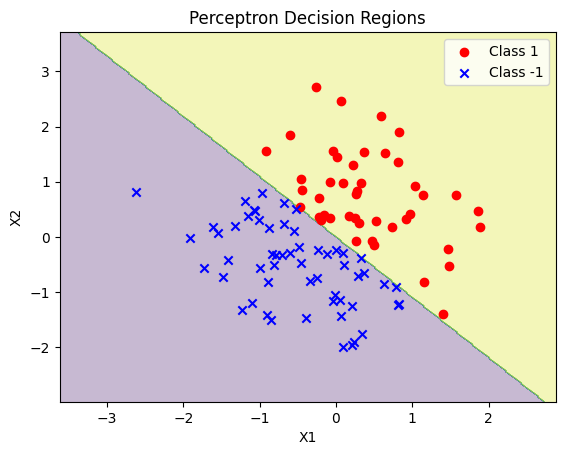

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(100, 2) 
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  

# Defining the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

perceptron = Perceptron()
perceptron.fit(X, y)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))

Z = perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='o', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', marker='x', label='Class -1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Perceptron Decision Regions')
plt.show()


In [ ]:
Aditi Chavan - 21259